## Import Modules

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('Toronto-emotional-speech-set-tess'):
    for filename in filenames: 
        paths.append(os.path.join(dirname, filename)) 
        label = filename.split('_')[-1]
        label = label.split('.')[0] 
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
len(paths)

2800

In [4]:
paths[:5]

['dataset\\kaggle\\input\\Toronto-emotional-speech-set-tess\\OAF_angry\\OAF_back_angry.wav',
 'dataset\\kaggle\\input\\Toronto-emotional-speech-set-tess\\OAF_angry\\OAF_bar_angry.wav',
 'dataset\\kaggle\\input\\Toronto-emotional-speech-set-tess\\OAF_angry\\OAF_base_angry.wav',
 'dataset\\kaggle\\input\\Toronto-emotional-speech-set-tess\\OAF_angry\\OAF_bath_angry.wav',
 'dataset\\kaggle\\input\\Toronto-emotional-speech-set-tess\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
# Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,dataset\kaggle\input\Toronto-emotional-speech-...,angry
1,dataset\kaggle\input\Toronto-emotional-speech-...,angry
2,dataset\kaggle\input\Toronto-emotional-speech-...,angry
3,dataset\kaggle\input\Toronto-emotional-speech-...,angry
4,dataset\kaggle\input\Toronto-emotional-speech-...,angry


In [7]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

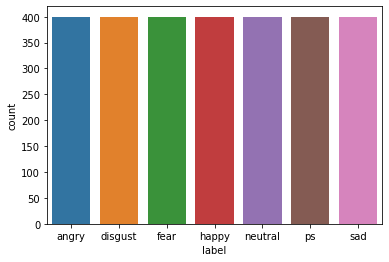

In [8]:
sns.countplot(df['label'])

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveplot(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

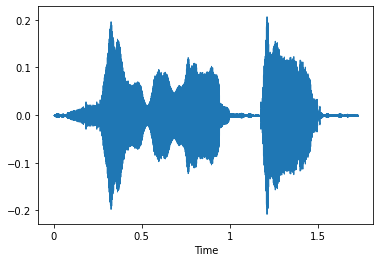

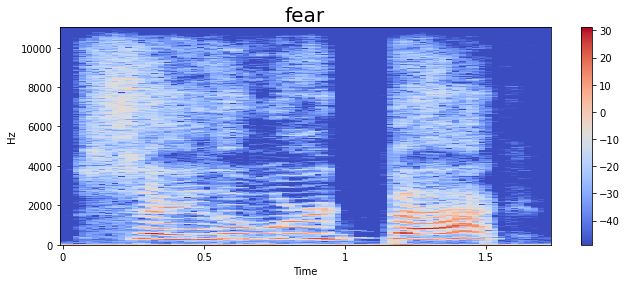

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

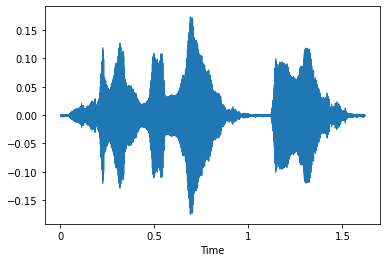

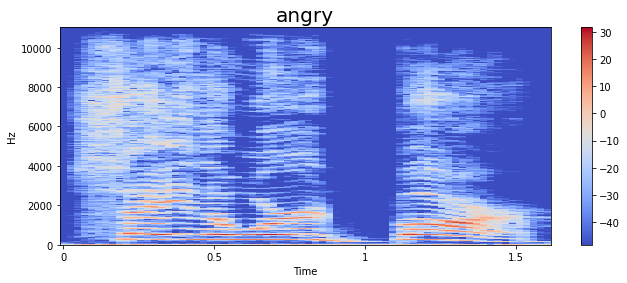

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

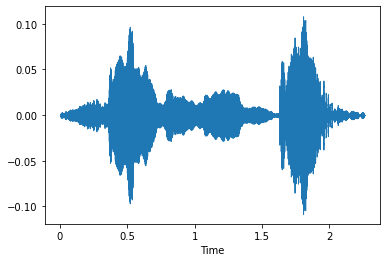

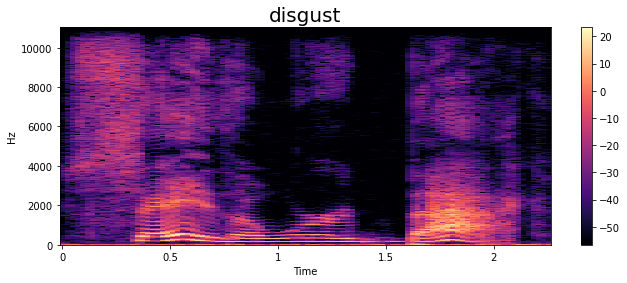

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

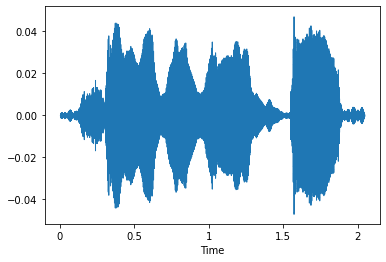

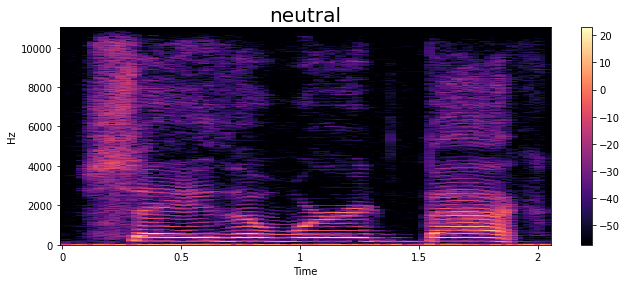

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

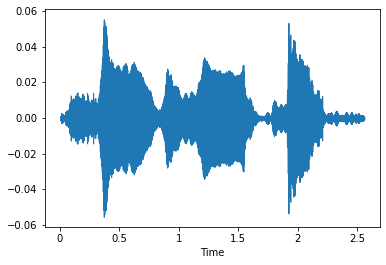

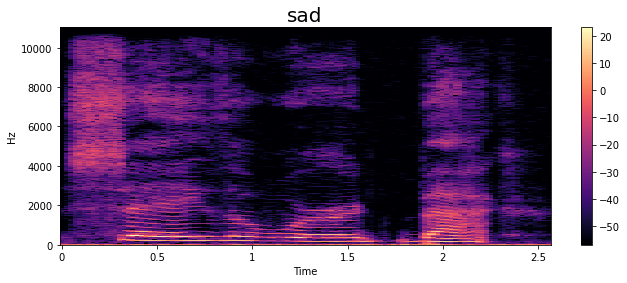

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

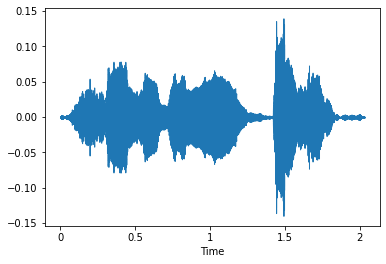

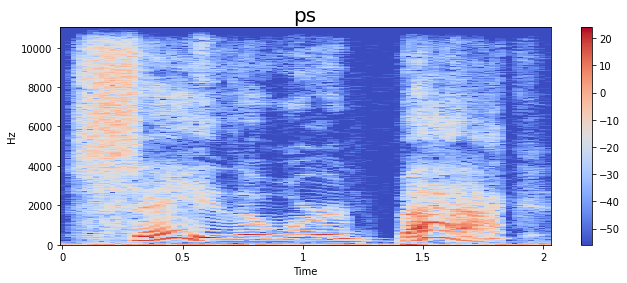

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

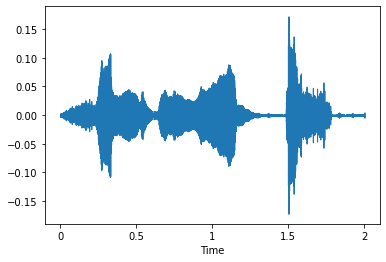

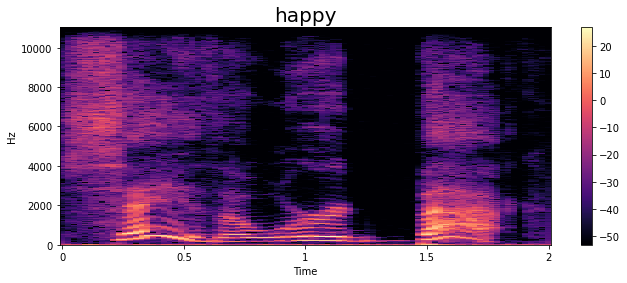

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
librosa.display.waveshow(data, sr=sampling_rate)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-3.97214874e+02,  7.77846832e+01, -1.99478245e+01, -2.13016663e+01,
       -2.47878695e+00,  1.04415865e+01, -2.07168369e+01, -5.74857569e+00,
       -7.55554676e+00, -2.10370615e-01, -2.18025589e+00,  5.51623166e-01,
        3.94573897e-01,  1.64459980e+00,  2.57582307e+00,  3.15656710e+00,
       -5.01068020e+00, -4.14153624e+00, -1.90491164e+00, -9.96853924e+00,
       -7.81200552e+00, -1.55172968e+00, -7.26189375e+00,  9.65194511e+00,
        8.14204216e+00,  2.19211063e+01,  1.90227432e+01,  2.05200424e+01,
        1.32593021e+01,  8.48793125e+00,  2.54911423e-01,  5.23840904e+00,
        9.45089054e+00,  5.56163883e+00,  2.41641927e+00, -1.74867535e+00,
        4.80002594e+00,  9.37272930e+00,  2.04265833e+00, -1.87645078e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-397.21487, 77.78468, -19.947824, -21.301666,...
1       [-465.9048, 99.04303, 0.38121262, -32.46538, -...
2       [-430.20264, 46.719677, 0.9373469, 0.4090697, ...
3       [-403.8607, 76.91445, -13.129478, -21.681879, ...
4       [-434.32446, 77.93651, 10.30538, 16.62942, 7.5...
                              ...                        
2795    [-553.55634, 90.357994, 26.69416, 16.947485, 1...
2796    [-589.4478, 96.50956, 36.6479, 15.324365, 28.3...
2797    [-533.81525, 86.02631, 27.186253, 19.917631, 2...
2798    [-548.88324, 110.565765, 31.504503, 12.984792,...
2799    [-549.6692, 102.92013, 31.717188, 26.823095, 2...
Name: speech, Length: 2800, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [22]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
y.shape

(2800, 7)

## Create the LSTM Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 77,127
Trainable params: 77,127
Non-traina

In [27]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 8s 105ms/step - loss: 1.5598 - accuracy: 0.4259 - val_loss: 1.7726 - val_accuracy: 0.2839
Epoch 2/50
35/35 [==============================] - 2s 67ms/step - loss: 0.9253 - accuracy: 0.6424 - val_loss: 1.1405 - val_accuracy: 0.3286
Epoch 3/50
35/35 [==============================] - 3s 83ms/step - loss: 0.6848 - accuracy: 0.7433 - val_loss: 1.0940 - val_accuracy: 0.3696
Epoch 4/50
35/35 [==============================] - 3s 73ms/step - loss: 0.4908 - accuracy: 0.8156 - val_loss: 0.5953 - val_accuracy: 0.8143
Epoch 5/50
35/35 [==============================] - 2s 62ms/step - loss: 0.3592 - accuracy: 0.8857 - val_loss: 0.3455 - val_accuracy: 0.9125
Epoch 6/50
35/35 [==============================] - 2s 57ms/step - loss: 0.2820 - accuracy: 0.9129 - val_loss: 0.1685 - val_accuracy: 0.9518
Epoch 7/50
35/35 [==============================] - 3s 77ms/step - loss: 0.2291 - accuracy: 0.9299 - val_loss: 0.2894 - val_accuracy: 0.9250
Epoch 8/50
3

## Plot the results

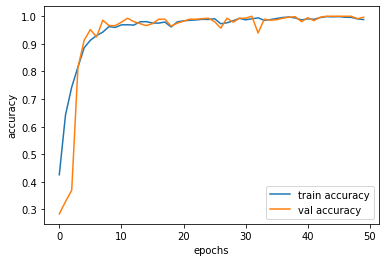

In [28]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

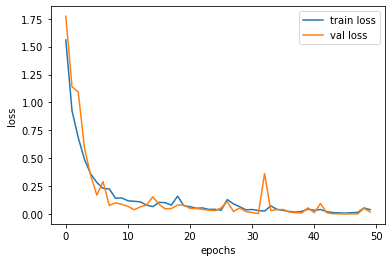

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
from keras.models import load_model

model.save('Emotion.h5') 

# Load Model

In [33]:
import keras
import librosa
import numpy as np



class LivePredictions:

    def __init__(self, file):
        self.file = file
        self.path = 'Emotion_model_lstm.h5'
        self.loaded_model = keras.models.load_model(self.path)

    def make_predictions(self):
        data, sampling_rate = librosa.load(self.file)
        mfccs = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
        x = np.expand_dims(mfccs, axis=1)
        x = np.expand_dims(x, axis=0)
       
        predictions = np.argmax(self.loaded_model.predict(x), axis=-1)
        
        print( "Prediction is", " ", self.convert_class_to_emotion(predictions))
        
    @staticmethod
        
    def convert_class_to_emotion(pred):
        """
        Method to convert the predictions (int) into human readable strings.
        """
        
        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label    

if __name__ == '__main__':
    live_prediction = LivePredictions('happy1.wav')
    #live_prediction.loaded_model.summary()
    live_prediction.make_predictions()


Prediction is   calm
